In [ ]:
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [ ]:
%cd /content/gdrive/MyDrive

/content/gdrive/MyDrive


In [ ]:
import os
import shutil

In [ ]:
folder_to_read="Audio/"
new_folder='emotions/'
os.makedirs(new_folder, exist_ok=True)
emotions={'01' : 'neutral', '02' : 'calm', '03' : 'happy', '04' : 'sad', '05' : 'angry', '06' : 'fearful', '07' : 'disgust', '08' : 'surprised'}
for emotion in emotions.values():
  emotion_folder=os.path.join(new_folder,emotion)
  os.makedirs(emotion_folder, exist_ok=True)
for actor in os.listdir(folder_to_read):
  actor_folder=os.path.join(folder_to_read,actor)
  for file in os.listdir(actor_folder):
    emotion_label=file.split('-')[2]
    emotion_name=emotions[emotion_label]
    emotion_folder=os.path.join(new_folder,emotion_name)
    file_path = os.path.join(actor_folder,file)
    shutil.copy(file_path, emotion_folder)

In [ ]:
import glob
import librosa
import librosa.display
import numpy as np
from sklearn.model_selection import KFold

In [ ]:
files=[]
labels=[]
new_folder='emotions/'
emotion_folders=os.listdir(new_folder)
for emotion in emotion_folders:
  emotion_path=os.path.join(new_folder,emotion)
  emotion_files=glob.glob(os.path.join(emotion_path,'*.wav'))
  for file in emotion_files:
    files.append(file)
  for i in range(len(emotion_files)):
    labels.append(emotion)

In [ ]:
def extract_features(file_path):
    audio, _ = librosa.load(file_path, sr=22050)
    features = librosa.feature.mfcc(y=audio, sr=22050, n_mfcc=13)
    return np.mean(features, axis=1)

In [ ]:
features_list=[extract_features(file) for file in files]

In [ ]:
X=np.array(features_list)

In [ ]:
emotion_dic={'neutral': 1, 'calm': 2, 'happy': 3, 'sad': 4, 'angry': 5, 'fearful': 6, 'disgust': 7, 'surprised': 8}
labels_num=[emotion_dic[i] for i in labels]
y=np.array(labels_num)

In [ ]:
kfold=KFold(n_splits=3,shuffle=True)
for train_index, test_index in kfold.split(X):
    X_train,X_test=X[train_index],X[test_index]
    y_train,y_test=y[train_index],y[test_index]

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, precision_score

In [ ]:
model=SVC()
model.fit(X_train_scaled,y_train)

SVC()

In [ ]:
y_pred_train=model.predict(X_train_scaled)
y_pred_test=model.predict(X_test_scaled)
print('accuracy train set',accuracy_score(y_train,y_pred_train))
print('accuracy test set',accuracy_score(y_test,y_pred_test))

accuracy train set 0.615625
accuracy test set 0.5


In [ ]:
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           1       0.75      0.11      0.19        27
           2       0.44      0.73      0.55        66
           3       0.52      0.49      0.50        70
           4       0.46      0.39      0.42        70
           5       0.70      0.71      0.70        65
           6       0.46      0.35      0.40        62
           7       0.45      0.40      0.42        60
           8       0.47      0.60      0.53        60

    accuracy                           0.50       480
   macro avg       0.53      0.47      0.47       480
weighted avg       0.51      0.50      0.49       480



In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
params={'C': [0.1,1,10,100], 'kernel': ['linear','poly','rbf']}
grid=GridSearchCV(SVC(),params,cv=3)
grid.fit(X_train_scaled,y_train)
print('meilleures paramètres:', grid.best_params_)
estimator=grid.best_estimator_
y_pred_train1=estimator.predict(X_train_scaled)
y_pred_test1=estimator.predict(X_test_scaled)
print('accuracy train set',accuracy_score(y_train,y_pred_train1))
print('accuracy test set',accuracy_score(y_test,y_pred_test1))

meilleures paramètres: {'C': 1, 'kernel': 'rbf'}
accuracy train set 0.615625
accuracy test set 0.5


In [ ]:
print(classification_report(y_train,y_pred_train1))

              precision    recall  f1-score   support

           1       0.43      0.04      0.08        69
           2       0.50      0.91      0.64       126
           3       0.71      0.58      0.64       122
           4       0.57      0.47      0.51       122
           5       0.79      0.72      0.75       127
           6       0.67      0.64      0.65       130
           7       0.66      0.62      0.64       132
           8       0.56      0.67      0.61       132

    accuracy                           0.62       960
   macro avg       0.61      0.58      0.57       960
weighted avg       0.62      0.62      0.60       960



In [ ]:
print(classification_report(y_test,y_pred_test1))

              precision    recall  f1-score   support

           1       0.75      0.11      0.19        27
           2       0.44      0.73      0.55        66
           3       0.52      0.49      0.50        70
           4       0.46      0.39      0.42        70
           5       0.70      0.71      0.70        65
           6       0.46      0.35      0.40        62
           7       0.45      0.40      0.42        60
           8       0.47      0.60      0.53        60

    accuracy                           0.50       480
   macro avg       0.53      0.47      0.47       480
weighted avg       0.51      0.50      0.49       480



In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
model2=DecisionTreeClassifier()
model2.fit(X_train_scaled,y_train)

DecisionTreeClassifier()

In [ ]:
y_pred_train2=model2.predict(X_train_scaled)
y_pred_test2=model2.predict(X_test_scaled)
print('accuracy train set',accuracy_score(y_train,y_pred_train2))
print('accuracy test set',accuracy_score(y_test,y_pred_test2))

accuracy train set 1.0
accuracy test set 0.3875


In [ ]:
params2={'criterion': ['gini', 'entropy'],'max_depth': [None, 10, 30],'min_samples_split': [2, 5, 9],'min_samples_leaf': range(1,5)}
grid2=GridSearchCV(DecisionTreeClassifier(),params2,cv=3)
grid2.fit(X_train_scaled,y_train)
print('meilleures paramètres:', grid2.best_params_)
estimator2=grid2.best_estimator_
y_pred_train3=estimator2.predict(X_train_scaled)
y_pred_test3=estimator2.predict(X_test_scaled)
print('accuracy train set',accuracy_score(y_train,y_pred_train3))
print('accuracy test set',accuracy_score(y_test,y_pred_test3))

meilleures paramètres: {'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 3, 'min_samples_split': 5}
accuracy train set 0.8052083333333333
accuracy test set 0.3729166666666667


In [ ]:
print(classification_report(y_train,y_pred_train3))

              precision    recall  f1-score   support

           1       0.71      0.87      0.78        69
           2       0.81      0.84      0.82       126
           3       0.75      0.87      0.80       122
           4       0.77      0.74      0.75       122
           5       0.90      0.82      0.86       127
           6       0.80      0.80      0.80       130
           7       0.87      0.81      0.84       132
           8       0.83      0.73      0.77       132

    accuracy                           0.81       960
   macro avg       0.80      0.81      0.80       960
weighted avg       0.81      0.81      0.81       960



In [ ]:
print(classification_report(y_test,y_pred_test3))

              precision    recall  f1-score   support

           1       0.30      0.37      0.33        27
           2       0.50      0.45      0.48        66
           3       0.41      0.46      0.43        70
           4       0.31      0.30      0.31        70
           5       0.51      0.43      0.47        65
           6       0.26      0.26      0.26        62
           7       0.29      0.30      0.30        60
           8       0.38      0.40      0.39        60

    accuracy                           0.37       480
   macro avg       0.37      0.37      0.37       480
weighted avg       0.38      0.37      0.37       480



In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
model3=RandomForestClassifier()
model3.fit(X_train_scaled,y_train)

RandomForestClassifier()

In [ ]:
y_pred_train4=model3.predict(X_train_scaled)
y_pred_test4=model3.predict(X_test_scaled)
print('accuracy train set',accuracy_score(y_train,y_pred_train4))
print('accuracy test set',accuracy_score(y_test,y_pred_test4))

accuracy train set 1.0
accuracy test set 0.5854166666666667


In [ ]:
params3={'n_estimators': [50, 100],'max_depth': [None, 10, 30],'min_samples_split': [2, 5, 9],'min_samples_leaf': range(1,5), 'bootstrap': [True, False]}
grid3=GridSearchCV(RandomForestClassifier(),params3,cv=3)
grid3.fit(X_train_scaled,y_train)
print('meilleures paramètres:', grid3.best_params_)
estimator3=grid3.best_estimator_
y_pred_train4=estimator3.predict(X_train_scaled)
y_pred_test4=estimator3.predict(X_test_scaled)
print('accuracy train set',accuracy_score(y_train,y_pred_train4))
print('accuracy test set',accuracy_score(y_test,y_pred_test4))

meilleures paramètres: {'bootstrap': True, 'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 100}
accuracy train set 0.9989583333333333
accuracy test set 0.5416666666666666


In [ ]:
def extract_mel_spectrogram_as_image(file_path):
    audio, _ = librosa.load(file_path, sr=22050)
    mel_spectrogram = librosa.feature.melspectrogram(y=audio, sr=22050, n_mels=128, hop_length=512)
    mel_spectrogram_db = librosa.power_to_db(mel_spectrogram, ref=np.max)
    normalized_mel_spectrogram = (mel_spectrogram_db - np.min(mel_spectrogram_db)) / (np.max(mel_spectrogram_db) - np.min(mel_spectrogram_db))
    return normalized_mel_spectrogram

In [ ]:
mel_spectrogram_images=[extract_mel_spectrogram_as_image(file) for file in files]

In [ ]:
import matplotlib.pyplot as plt

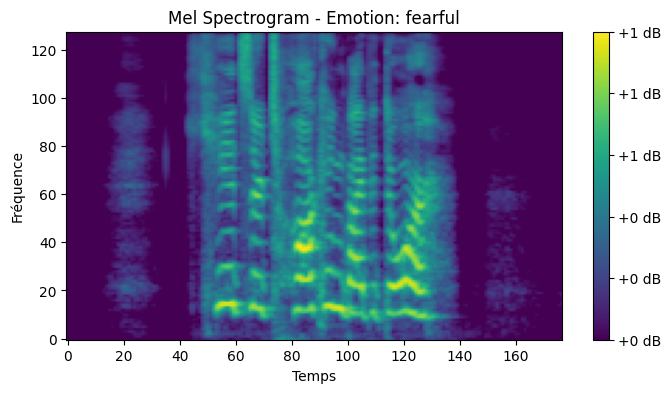

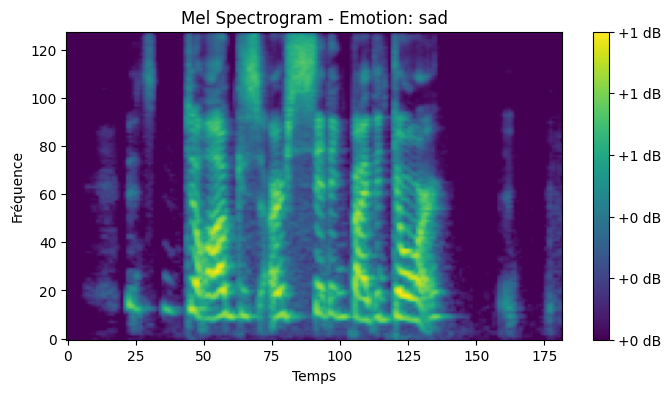

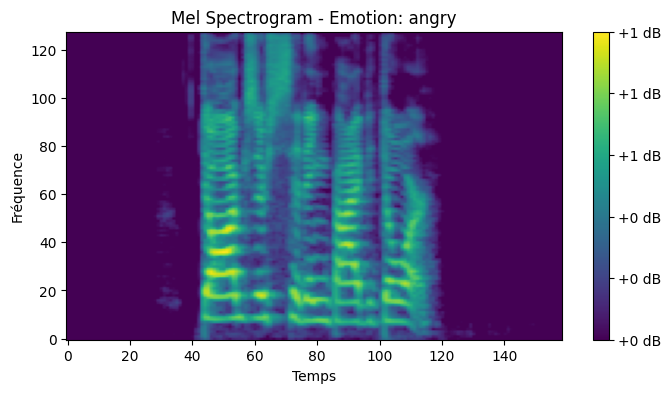

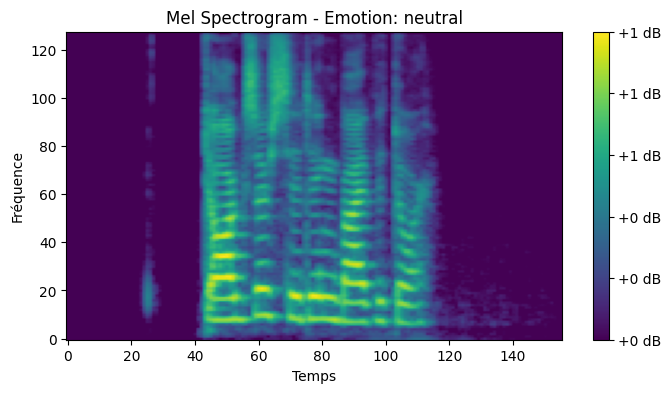

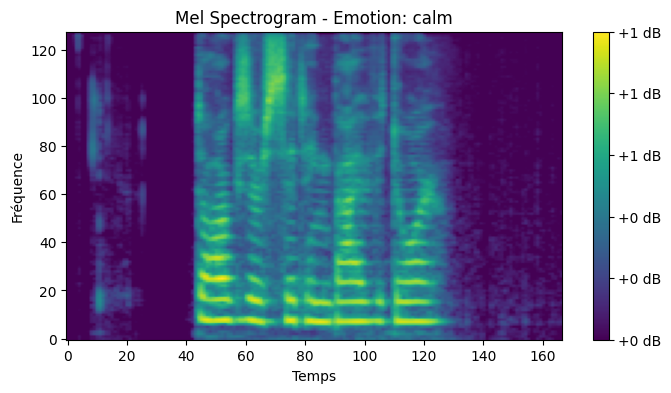

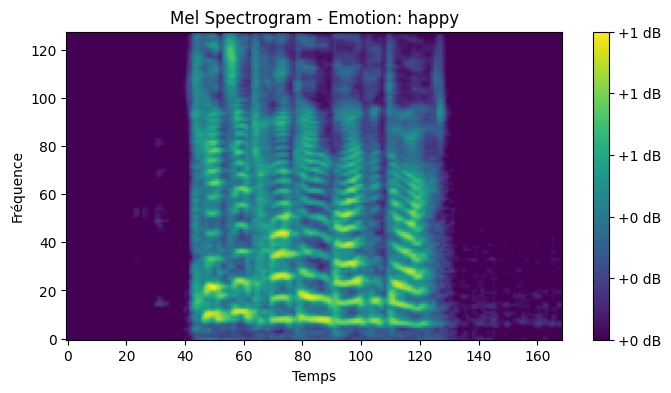

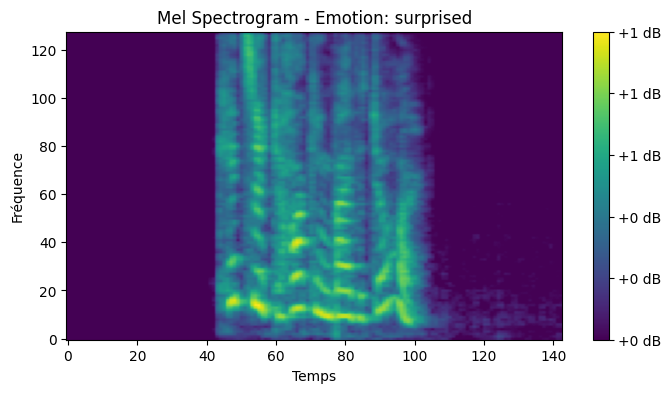

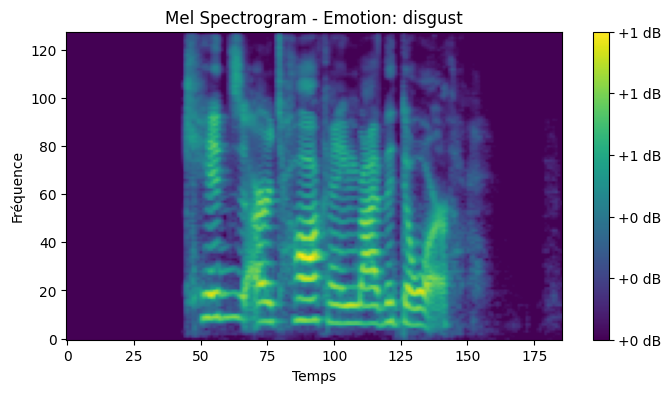

In [ ]:
for emotion in set(labels):
    index = labels.index(emotion)
    file_path = files[index]
    mel_spectrogram_image = extract_mel_spectrogram_as_image(file_path)
    plt.figure(figsize=(8, 4))
    plt.imshow(mel_spectrogram_image, cmap='viridis', origin='lower', aspect='auto')
    plt.title(f'Mel Spectrogram - Emotion: {emotion}')
    plt.xlabel('Temps')
    plt.ylabel('Fréquence')
    plt.colorbar(format='%+2.0f dB')
    plt.show()

In [ ]:
for idx, mel_spectrogram in enumerate(mel_spectrogram_images[:10]):
    print(f"Array {idx + 1} Shape: {mel_spectrogram.shape}")

Array 1 Shape: (128, 156)
Array 2 Shape: (128, 160)
Array 3 Shape: (128, 157)
Array 4 Shape: (128, 157)
Array 5 Shape: (128, 153)
Array 6 Shape: (128, 156)
Array 7 Shape: (128, 157)
Array 8 Shape: (128, 149)
Array 9 Shape: (128, 166)
Array 10 Shape: (128, 172)


In [ ]:
target_shape=(128, 156)
resized_images=[librosa.util.fix_length(image, size=target_shape[1], axis=1) for image in mel_spectrogram_images]
X1=np.stack(resized_images)

In [ ]:
X1=X1[..., np.newaxis]

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
label_encoder = LabelEncoder()
y1 = label_encoder.fit_transform(labels)

In [ ]:
n_splits = 3
kfold = KFold(n_splits=n_splits, shuffle=True, random_state=42)

In [ ]:
for fold, (train_index, test_index) in enumerate(kfold.split(X1)):
    X_train1, X_test1 = X1[train_index], X1[test_index]
    y_train1, y_test1 = y1[train_index], y1[test_index]

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models

In [ ]:
model4 = models.Sequential()
model4.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(X_train1.shape[1:])))
model4.add(layers.MaxPooling2D((2, 2)))
model4.add(layers.Conv2D(64, (3, 3), activation='relu'))
model4.add(layers.MaxPooling2D((2, 2)))
model4.add(layers.Flatten())
model4.add(layers.Dense(64, activation='relu'))
model4.add(layers.Dense(len(set(labels)), activation='softmax'))

In [ ]:
model4.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
model4.fit(X_train1, y_train1, epochs=30, validation_data=(X_test1, y_test1))

Epoch 1/30
30/30 [==============================] - 1s 24ms/step - loss: 5.9413e-04 - accuracy: 1.0000 - val_loss: 2.2944 - val_accuracy: 0.5583
Epoch 2/30
30/30 [==============================] - 1s 18ms/step - loss: 5.5684e-04 - accuracy: 1.0000 - val_loss: 2.3152 - val_accuracy: 0.5667
Epoch 3/30
30/30 [==============================] - 1s 21ms/step - loss: 5.0924e-04 - accuracy: 1.0000 - val_loss: 2.3315 - val_accuracy: 0.5646
Epoch 4/30
30/30 [==============================] - 1s 19ms/step - loss: 4.6875e-04 - accuracy: 1.0000 - val_loss: 2.3510 - val_accuracy: 0.5604
Epoch 5/30
30/30 [==============================] - 1s 21ms/step - loss: 4.3847e-04 - accuracy: 1.0000 - val_loss: 2.3632 - val_accuracy: 0.5646
Epoch 6/30
30/30 [==============================] - 1s 22ms/step - loss: 4.1029e-04 - accuracy: 1.0000 - val_loss: 2.3979 - val_accuracy: 0.5562
Epoch 7/30
30/30 [==============================] - 1s 20ms/step - loss: 3.9073e-04 - accuracy: 1.0000 - val_loss: 2.3782 - val_ac

In [ ]:
model5 = models.Sequential()
model5.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(X_train1.shape[1:])))
model5.add(layers.MaxPooling2D((2, 2)))
model5.add(layers.Conv2D(64, (3, 3), activation='relu'))
model5.add(layers.MaxPooling2D((2, 2)))
model5.add(layers.Flatten())
model5.add(layers.Dropout(0.5))
model5.add(layers.Dense(64, activation='relu'))
model5.add(layers.Dropout(0.5))
model5.add(layers.Dense(len(set(labels)), activation='softmax'))
model5.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
model5.fit(X_train1, y_train1, epochs=30, validation_data=(X_test1, y_test1))

Epoch 1/30
30/30 [==============================] - 1s 29ms/step - loss: 0.2711 - accuracy: 0.8896 - val_loss: 2.1057 - val_accuracy: 0.5813
Epoch 2/30
30/30 [==============================] - 1s 22ms/step - loss: 0.2865 - accuracy: 0.8729 - val_loss: 2.3884 - val_accuracy: 0.5896
Epoch 3/30
30/30 [==============================] - 1s 20ms/step - loss: 0.2727 - accuracy: 0.8813 - val_loss: 2.2630 - val_accuracy: 0.6021
Epoch 4/30
30/30 [==============================] - 1s 19ms/step - loss: 0.2420 - accuracy: 0.9135 - val_loss: 2.4264 - val_accuracy: 0.5750
Epoch 5/30
30/30 [==============================] - 1s 20ms/step - loss: 0.2984 - accuracy: 0.8885 - val_loss: 2.3039 - val_accuracy: 0.5979
Epoch 6/30
30/30 [==============================] - 1s 20ms/step - loss: 0.2678 - accuracy: 0.9021 - val_loss: 2.1886 - val_accuracy: 0.5771
Epoch 7/30
30/30 [==============================] - 1s 20ms/step - loss: 0.2760 - accuracy: 0.8885 - val_loss: 2.6070 - val_accuracy: 0.5688
Epoch 8/30
30

In [ ]:
model5.evaluate(X_test1,y_test1)

15/15 [==============================] - 0s 7ms/step - loss: 2.1680 - accuracy: 0.5771


[2.168044328689575, 0.5770833492279053]

In [ ]:
model5.evaluate(X_train1,y_train1)

30/30 [==============================] - 0s 7ms/step - loss: 0.0037 - accuracy: 1.0000


[0.0036919552367180586, 1.0]

In [ ]:
y_pred_train5=model5.predict(X_train1)
y_pred_test5=model5.predict(X_test1)

15/15 [==============================] - 0s 5ms/step


In [ ]:
y_pred_train5=[np.argmax(i) for i in y_pred_train5]
y_pred_test5=[np.argmax(i) for i in y_pred_test5]

In [ ]:
print(classification_report(y_train1,y_pred_train5))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       120
           1       1.00      1.00      1.00       132
           2       1.00      1.00      1.00       125
           3       1.00      1.00      1.00       132
           4       1.00      1.00      1.00       135
           5       1.00      1.00      1.00        68
           6       1.00      1.00      1.00       127
           7       1.00      1.00      1.00       121

    accuracy                           1.00       960
   macro avg       1.00      1.00      1.00       960
weighted avg       1.00      1.00      1.00       960



In [ ]:
print(classification_report(y_test1,y_pred_test5))

              precision    recall  f1-score   support

           0       0.69      0.62      0.66        72
           1       0.72      0.57      0.64        60
           2       0.63      0.64      0.64        67
           3       0.70      0.58      0.64        60
           4       0.39      0.58      0.46        57
           5       0.55      0.43      0.48        28
           6       0.39      0.48      0.43        65
           7       0.69      0.62      0.65        71

    accuracy                           0.58       480
   macro avg       0.60      0.57      0.57       480
weighted avg       0.60      0.58      0.58       480



In [ ]:
!pip install opencv-python

In [ ]:
import cv2
import numpy as np
from keras.applications.vgg19 import VGG19, preprocess_input
from keras.models import Sequential
from keras.layers import Dense,GlobalAveragePooling2D
from keras.utils import to_categorical

In [ ]:
resized_images_train = [cv2.resize(image, (224, 224)) for image in X_train1]
resized_images_test = [cv2.resize(image, (224, 224)) for image in X_test1]
X_train_resized = np.stack(resized_images_train)
X_test_resized = np.stack(resized_images_test)
X_train_resized_rgb = np.repeat(X_train_resized[..., np.newaxis], 3, -1)
X_test_resized_rgb = np.repeat(X_test_resized[..., np.newaxis], 3, -1)
X_train_preprocessed = preprocess_input(X_train_resized_rgb)
X_test_preprocessed = preprocess_input(X_test_resized_rgb)
y_train_categorical = to_categorical(y_train1, num_classes=8)
y_test_categorical = to_categorical(y_test1, num_classes=8)
base_model = VGG19(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
base_model.trainable = False
model6 = Sequential()
model6.add(base_model)
model6.add(GlobalAveragePooling2D())
model6.add(Dense(8, activation='softmax'))
model6.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

80134624/80134624 [==============================] - 1s 0us/step


In [ ]:
model6.fit(X_train_preprocessed, y_train_categorical, epochs=10, batch_size=32, validation_data=(X_test_preprocessed, y_test_categorical))

Epoch 1/10
30/30 [==============================] - 9s 293ms/step - loss: 2.0707 - accuracy: 0.1312 - val_loss: 2.0581 - val_accuracy: 0.1292
Epoch 2/10
30/30 [==============================] - 8s 272ms/step - loss: 2.0678 - accuracy: 0.1104 - val_loss: 2.0624 - val_accuracy: 0.1271
Epoch 3/10
30/30 [==============================] - 8s 268ms/step - loss: 2.0739 - accuracy: 0.1271 - val_loss: 2.0580 - val_accuracy: 0.1208
Epoch 4/10
30/30 [==============================] - 11s 371ms/step - loss: 2.0691 - accuracy: 0.1187 - val_loss: 2.0599 - val_accuracy: 0.1187
Epoch 5/10
30/30 [==============================] - 11s 363ms/step - loss: 2.0684 - accuracy: 0.1344 - val_loss: 2.0633 - val_accuracy: 0.1250
Epoch 6/10
30/30 [==============================] - 8s 279ms/step - loss: 2.0688 - accuracy: 0.1135 - val_loss: 2.0567 - val_accuracy: 0.1333
Epoch 7/10
30/30 [==============================] - 10s 353ms/step - loss: 2.0666 - accuracy: 0.1344 - val_loss: 2.0579 - val_accuracy: 0.1187
Epo

In [ ]:
model6.evaluate(X_train_preprocessed,y_train_categorical)

30/30 [==============================] - 5s 176ms/step - loss: 2.0618 - accuracy: 0.1344


[2.0618152618408203, 0.13437500596046448]

In [ ]:
model6.evaluate(X_test_preprocessed,y_test_categorical)

15/15 [==============================] - 3s 167ms/step - loss: 2.0564 - accuracy: 0.1437


[2.0563557147979736, 0.14374999701976776]

In [ ]:
y_pred_test6 = model6.predict(X_test_preprocessed)
y_pred_test6 = np.argmax(y_pred_test6,axis=1)

15/15 [==============================] - 3s 168ms/step


In [ ]:
print(classification_report(np.argmax(y_test_categorical, axis=1), y_pred_test6))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        72
           1       0.00      0.00      0.00        60
           2       0.00      0.00      0.00        67
           3       0.12      0.63      0.20        60
           4       0.00      0.00      0.00        57
           5       0.00      0.00      0.00        28
           6       0.19      0.48      0.27        65
           7       0.00      0.00      0.00        71

    accuracy                           0.14       480
   macro avg       0.04      0.14      0.06       480
weighted avg       0.04      0.14      0.06       480



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
y_pred_train6 = model6.predict(X_train_preprocessed)
y_pred_train6 = np.argmax(y_pred_train6,axis=1)
print(classification_report(np.argmax(y_train_categorical, axis=1), y_pred_train6))

30/30 [==============================] - 5s 171ms/step
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       120
           1       0.00      0.00      0.00       132
           2       0.75      0.02      0.05       125
           3       0.11      0.48      0.18       132
           4       0.00      0.00      0.00       135
           5       0.00      0.00      0.00        68
           6       0.17      0.49      0.25       127
           7       0.00      0.00      0.00       121

    accuracy                           0.13       960
   macro avg       0.13      0.12      0.06       960
weighted avg       0.13      0.13      0.06       960



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
from keras.applications.vgg16 import VGG16, preprocess_input

In [ ]:
X_train_preprocessed1 = preprocess_input(X_train_resized_rgb)
X_test_preprocessed1 = preprocess_input(X_test_resized_rgb)
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
base_model.trainable = False
model7 = Sequential()
model7.add(base_model)
model7.add(GlobalAveragePooling2D())
model7.add(Dense(8, activation='softmax'))
model7.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

58889256/58889256 [==============================] - 0s 0us/step


In [ ]:
model7.fit(X_train_preprocessed1, y_train_categorical, epochs=20, batch_size=32, validation_data=(X_test_preprocessed1, y_test_categorical))

Epoch 1/20
30/30 [==============================] - 7s 251ms/step - loss: 2.0856 - accuracy: 0.1281 - val_loss: 2.1043 - val_accuracy: 0.1250
Epoch 2/20
30/30 [==============================] - 6s 216ms/step - loss: 2.0830 - accuracy: 0.1312 - val_loss: 2.0650 - val_accuracy: 0.1396
Epoch 3/20
30/30 [==============================] - 6s 219ms/step - loss: 2.0833 - accuracy: 0.1125 - val_loss: 2.0702 - val_accuracy: 0.1354
Epoch 4/20
30/30 [==============================] - 7s 227ms/step - loss: 2.0809 - accuracy: 0.1229 - val_loss: 2.0592 - val_accuracy: 0.1479
Epoch 5/20
30/30 [==============================] - 7s 227ms/step - loss: 2.0711 - accuracy: 0.1396 - val_loss: 2.0974 - val_accuracy: 0.1250
Epoch 6/20
30/30 [==============================] - 7s 238ms/step - loss: 2.0815 - accuracy: 0.1365 - val_loss: 2.0763 - val_accuracy: 0.1250
Epoch 7/20
30/30 [==============================] - 7s 221ms/step - loss: 2.0846 - accuracy: 0.1260 - val_loss: 2.0819 - val_accuracy: 0.1250
Epoch 

In [ ]:
y_pred_train7 = model7.predict(X_train_preprocessed1)
y_pred_train7 = np.argmax(y_pred_train7,axis=1)
print(classification_report(np.argmax(y_train_categorical, axis=1), y_pred_train7))

30/30 [==============================] - 4s 140ms/step
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       120
           1       0.00      0.00      0.00       132
           2       0.13      1.00      0.23       125
           3       0.00      0.00      0.00       132
           4       0.00      0.00      0.00       135
           5       0.00      0.00      0.00        68
           6       0.00      0.00      0.00       127
           7       0.00      0.00      0.00       121

    accuracy                           0.13       960
   macro avg       0.02      0.12      0.03       960
weighted avg       0.02      0.13      0.03       960



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
y_pred_test7 = model7.predict(X_test_preprocessed1)
y_pred_test7 = np.argmax(y_pred_test7, axis=1)
print(classification_report(np.argmax(y_test_categorical, axis=1), y_pred_test7))

15/15 [==============================] - 2s 141ms/step
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        72
           1       0.00      0.00      0.00        60
           2       0.14      1.00      0.24        67
           3       0.00      0.00      0.00        60
           4       0.00      0.00      0.00        57
           5       0.00      0.00      0.00        28
           6       0.00      0.00      0.00        65
           7       0.00      0.00      0.00        71

    accuracy                           0.14       480
   macro avg       0.02      0.12      0.03       480
weighted avg       0.02      0.14      0.03       480



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
from keras.applications.densenet import DenseNet121, preprocess_input

In [ ]:
X_train_preprocessed2 = preprocess_input(X_train_resized_rgb)
X_test_preprocessed2 = preprocess_input(X_test_resized_rgb)
base_model = DenseNet121(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
base_model.trainable = False
model8 = Sequential()
model8.add(base_model)
model8.add(GlobalAveragePooling2D())
model8.add(Dense(8, activation='softmax'))
model8.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

29084464/29084464 [==============================] - 0s 0us/step


In [ ]:
model8.fit(X_train_preprocessed2, y_train_categorical, epochs=20, batch_size=32, validation_data=(X_test_preprocessed2, y_test_categorical))

Epoch 1/20
30/30 [==============================] - 20s 283ms/step - loss: 2.1409 - accuracy: 0.1052 - val_loss: 2.0689 - val_accuracy: 0.1187
Epoch 2/20
30/30 [==============================] - 5s 162ms/step - loss: 2.0808 - accuracy: 0.1354 - val_loss: 2.0606 - val_accuracy: 0.1500
Epoch 3/20
30/30 [==============================] - 5s 157ms/step - loss: 2.0818 - accuracy: 0.1187 - val_loss: 2.0636 - val_accuracy: 0.1500
Epoch 4/20
30/30 [==============================] - 6s 193ms/step - loss: 2.0895 - accuracy: 0.1281 - val_loss: 2.0537 - val_accuracy: 0.1667
Epoch 5/20
30/30 [==============================] - 6s 196ms/step - loss: 2.0764 - accuracy: 0.1448 - val_loss: 2.0859 - val_accuracy: 0.1187
Epoch 6/20
30/30 [==============================] - 5s 154ms/step - loss: 2.0799 - accuracy: 0.1198 - val_loss: 2.0694 - val_accuracy: 0.1250
Epoch 7/20
30/30 [==============================] - 5s 160ms/step - loss: 2.0807 - accuracy: 0.1271 - val_loss: 2.0675 - val_accuracy: 0.1187
Epoch

In [ ]:
y_pred_train8 = model8.predict(X_train_preprocessed2)
y_pred_train8 = np.argmax(y_pred_train8,axis=1)
print(classification_report(np.argmax(y_train_categorical, axis=1), y_pred_train8))

30/30 [==============================] - 5s 99ms/step
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       120
           1       0.00      0.00      0.00       132
           2       0.00      0.00      0.00       125
           3       0.00      0.00      0.00       132
           4       0.00      0.00      0.00       135
           5       0.00      0.00      0.00        68
           6       0.13      1.00      0.23       127
           7       0.00      0.00      0.00       121

    accuracy                           0.13       960
   macro avg       0.02      0.12      0.03       960
weighted avg       0.02      0.13      0.03       960



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
y_pred_test8 = model8.predict(X_test_preprocessed1)
y_pred_test8 = np.argmax(y_pred_test8, axis=1)
print(classification_report(np.argmax(y_test_categorical, axis=1), y_pred_test8))

15/15 [==============================] - 2s 104ms/step
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        72
           1       0.00      0.00      0.00        60
           2       0.00      0.00      0.00        67
           3       0.00      0.00      0.00        60
           4       0.00      0.00      0.00        57
           5       0.00      0.00      0.00        28
           6       0.14      1.00      0.24        65
           7       0.00      0.00      0.00        71

    accuracy                           0.14       480
   macro avg       0.02      0.12      0.03       480
weighted avg       0.02      0.14      0.03       480



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
from keras.applications.resnet50 import ResNet50, preprocess_input

In [ ]:
X_train_preprocessed3 = preprocess_input(X_train_resized_rgb)
X_test_preprocessed3 = preprocess_input(X_test_resized_rgb)
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
base_model.trainable = False
model9 = Sequential()
model9.add(base_model)
model9.add(GlobalAveragePooling2D())
model9.add(Dense(8, activation='softmax'))
model9.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

94765736/94765736 [==============================] - 1s 0us/step


In [ ]:
model9.fit(X_train_preprocessed3, y_train_categorical, epochs=20, batch_size=32, validation_data=(X_test_preprocessed3, y_test_categorical))

Epoch 1/20
30/30 [==============================] - 12s 250ms/step - loss: 2.1908 - accuracy: 0.1354 - val_loss: 2.0867 - val_accuracy: 0.1500
Epoch 2/20
30/30 [==============================] - 5s 160ms/step - loss: 2.1176 - accuracy: 0.1177 - val_loss: 2.1003 - val_accuracy: 0.1396
Epoch 3/20
30/30 [==============================] - 6s 195ms/step - loss: 2.0985 - accuracy: 0.1323 - val_loss: 2.0955 - val_accuracy: 0.1250
Epoch 4/20
30/30 [==============================] - 5s 162ms/step - loss: 2.0932 - accuracy: 0.1167 - val_loss: 2.0683 - val_accuracy: 0.1250
Epoch 5/20
30/30 [==============================] - 5s 158ms/step - loss: 2.1012 - accuracy: 0.1250 - val_loss: 2.0668 - val_accuracy: 0.1500
Epoch 6/20
30/30 [==============================] - 6s 194ms/step - loss: 2.0829 - accuracy: 0.1312 - val_loss: 2.0818 - val_accuracy: 0.1354
Epoch 7/20
30/30 [==============================] - 5s 157ms/step - loss: 2.0900 - accuracy: 0.1344 - val_loss: 2.0866 - val_accuracy: 0.1479
Epoch

In [ ]:
y_pred_train9 = model9.predict(X_train_preprocessed3)
y_pred_train9 = np.argmax(y_pred_train9,axis=1)
print(classification_report(np.argmax(y_train_categorical, axis=1), y_pred_train9))

30/30 [==============================] - 3s 96ms/step
              precision    recall  f1-score   support

           0       0.12      1.00      0.22       120
           1       0.00      0.00      0.00       132
           2       0.00      0.00      0.00       125
           3       0.00      0.00      0.00       132
           4       0.00      0.00      0.00       135
           5       0.00      0.00      0.00        68
           6       0.00      0.00      0.00       127
           7       0.00      0.00      0.00       121

    accuracy                           0.12       960
   macro avg       0.02      0.12      0.03       960
weighted avg       0.02      0.12      0.03       960



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
y_pred_test9 = model9.predict(X_test_preprocessed3)
y_pred_test9 = np.argmax(y_pred_test9, axis=1)
print(classification_report(np.argmax(y_test_categorical, axis=1), y_pred_test9))

15/15 [==============================] - 1s 96ms/step
              precision    recall  f1-score   support

           0       0.15      1.00      0.26        72
           1       0.00      0.00      0.00        60
           2       0.00      0.00      0.00        67
           3       0.00      0.00      0.00        60
           4       0.00      0.00      0.00        57
           5       0.00      0.00      0.00        28
           6       0.00      0.00      0.00        65
           7       0.00      0.00      0.00        71

    accuracy                           0.15       480
   macro avg       0.02      0.12      0.03       480
weighted avg       0.02      0.15      0.04       480



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
from keras.applications.mobilenet_v2 import MobileNetV2, preprocess_input

In [ ]:
X_train_preprocessed4 = preprocess_input(X_train_resized_rgb)
X_test_preprocessed4 = preprocess_input(X_test_resized_rgb)
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
base_model.trainable = False
model10 = Sequential()
model10.add(base_model)
model10.add(GlobalAveragePooling2D())
model10.add(Dense(8, activation='softmax'))
model10.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

9406464/9406464 [==============================] - 0s 0us/step


In [ ]:
model10.fit(X_train_preprocessed4, y_train_categorical, epochs=20, batch_size=32, validation_data=(X_test_preprocessed4, y_test_categorical))

Epoch 1/20
30/30 [==============================] - 7s 122ms/step - loss: 2.1427 - accuracy: 0.1229 - val_loss: 2.0751 - val_accuracy: 0.1479
Epoch 2/20
30/30 [==============================] - 2s 79ms/step - loss: 2.0954 - accuracy: 0.1240 - val_loss: 2.0869 - val_accuracy: 0.1354
Epoch 3/20
30/30 [==============================] - 3s 98ms/step - loss: 2.1092 - accuracy: 0.1406 - val_loss: 2.0923 - val_accuracy: 0.1250
Epoch 4/20
30/30 [==============================] - 2s 71ms/step - loss: 2.0983 - accuracy: 0.1406 - val_loss: 2.0625 - val_accuracy: 0.1250
Epoch 5/20
30/30 [==============================] - 2s 71ms/step - loss: 2.0942 - accuracy: 0.1240 - val_loss: 2.0636 - val_accuracy: 0.1250
Epoch 6/20
30/30 [==============================] - 2s 71ms/step - loss: 2.0985 - accuracy: 0.1260 - val_loss: 2.0713 - val_accuracy: 0.1250
Epoch 7/20
30/30 [==============================] - 2s 70ms/step - loss: 2.0824 - accuracy: 0.1333 - val_loss: 2.0906 - val_accuracy: 0.1250
Epoch 8/20
3

In [ ]:
y_pred_train10 = model10.predict(X_train_preprocessed4)
y_pred_train10 = np.argmax(y_pred_train10,axis=1)
print(classification_report(np.argmax(y_train_categorical, axis=1), y_pred_train10))

30/30 [==============================] - 2s 44ms/step
              precision    recall  f1-score   support

           0       0.12      1.00      0.22       120
           1       0.00      0.00      0.00       132
           2       0.00      0.00      0.00       125
           3       0.00      0.00      0.00       132
           4       0.00      0.00      0.00       135
           5       0.00      0.00      0.00        68
           6       0.00      0.00      0.00       127
           7       0.00      0.00      0.00       121

    accuracy                           0.12       960
   macro avg       0.02      0.12      0.03       960
weighted avg       0.02      0.12      0.03       960



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
y_pred_test10 = model10.predict(X_test_preprocessed4)
y_pred_test10 = np.argmax(y_pred_test10, axis=1)
print(classification_report(np.argmax(y_test_categorical, axis=1), y_pred_test10))

15/15 [==============================] - 1s 46ms/step
              precision    recall  f1-score   support

           0       0.15      1.00      0.26        72
           1       0.00      0.00      0.00        60
           2       0.00      0.00      0.00        67
           3       0.00      0.00      0.00        60
           4       0.00      0.00      0.00        57
           5       0.00      0.00      0.00        28
           6       0.00      0.00      0.00        65
           7       0.00      0.00      0.00        71

    accuracy                           0.15       480
   macro avg       0.02      0.12      0.03       480
weighted avg       0.02      0.15      0.04       480



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
from keras.applications.xception import Xception, preprocess_input

In [ ]:
resized_images_train1 = [cv2.resize(image, (299, 299)) for image in X_train1]
resized_images_test1 = [cv2.resize(image, (299, 299)) for image in X_test1]
X_train_resized1 = np.stack(resized_images_train1)
X_test_resized1 = np.stack(resized_images_test1)
X_train_resized_rgb1 = np.repeat(X_train_resized1[..., np.newaxis], 3, -1)
X_test_resized_rgb1 = np.repeat(X_test_resized1[..., np.newaxis], 3, -1)
X_train_preprocessed5 = preprocess_input(X_train_resized_rgb1)
X_test_preprocessed5 = preprocess_input(X_test_resized_rgb1)
base_model = Xception(weights='imagenet', include_top=False, input_shape=(299, 299, 3))
base_model.trainable = False
model11 = Sequential()
model11.add(base_model)
model11.add(GlobalAveragePooling2D())
model11.add(Dense(8, activation='softmax'))
model11.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

83683744/83683744 [==============================] - 0s 0us/step


In [ ]:
model11.fit(X_train_preprocessed5, y_train_categorical, epochs=10, batch_size=32, validation_data=(X_test_preprocessed5, y_test_categorical))

Epoch 1/10
30/30 [==============================] - 26s 403ms/step - loss: 2.0864 - accuracy: 0.1125 - val_loss: 2.0531 - val_accuracy: 0.1396
Epoch 2/10
30/30 [==============================] - 10s 335ms/step - loss: 2.0684 - accuracy: 0.1375 - val_loss: 2.0696 - val_accuracy: 0.1354
Epoch 3/10
30/30 [==============================] - 12s 396ms/step - loss: 2.0713 - accuracy: 0.1271 - val_loss: 2.0615 - val_accuracy: 0.1250
Epoch 4/10
30/30 [==============================] - 12s 398ms/step - loss: 2.0644 - accuracy: 0.1135 - val_loss: 2.0649 - val_accuracy: 0.1729
Epoch 5/10
30/30 [==============================] - 10s 345ms/step - loss: 2.0663 - accuracy: 0.1396 - val_loss: 2.0526 - val_accuracy: 0.1542
Epoch 6/10
30/30 [==============================] - 11s 355ms/step - loss: 2.0618 - accuracy: 0.1333 - val_loss: 2.0452 - val_accuracy: 0.1271
Epoch 7/10
30/30 [==============================] - 11s 358ms/step - loss: 2.0549 - accuracy: 0.1573 - val_loss: 2.0504 - val_accuracy: 0.1771

In [ ]:
y_pred_train11 = model11.predict(X_train_preprocessed5)
y_pred_train11 = np.argmax(y_pred_train11,axis=1)
print(classification_report(np.argmax(y_train_categorical, axis=1), y_pred_train11))

30/30 [==============================] - 7s 226ms/step
              precision    recall  f1-score   support

           0       0.50      0.01      0.02       120
           1       0.38      0.56      0.45       132
           2       0.19      0.95      0.32       125
           3       0.46      0.30      0.36       132
           4       0.41      0.16      0.23       135
           5       0.00      0.00      0.00        68
           6       0.00      0.00      0.00       127
           7       0.00      0.00      0.00       121

    accuracy                           0.26       960
   macro avg       0.24      0.25      0.17       960
weighted avg       0.26      0.26      0.19       960



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
y_pred_test11 = model11.predict(X_test_preprocessed5)
y_pred_test11 = np.argmax(y_pred_test11,axis=1)
print(classification_report(np.argmax(y_test_categorical, axis=1), y_pred_test11))

15/15 [==============================] - 3s 231ms/step
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        72
           1       0.41      0.58      0.48        60
           2       0.19      0.94      0.32        67
           3       0.44      0.27      0.33        60
           4       0.24      0.14      0.18        57
           5       0.00      0.00      0.00        28
           6       0.00      0.00      0.00        65
           7       0.00      0.00      0.00        71

    accuracy                           0.25       480
   macro avg       0.16      0.24      0.16       480
weighted avg       0.16      0.25      0.17       480



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
